In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(2024)

# Load the npy file
# These are the latent features generated by VAE models trained with the majority class data ONLY and minority class data ONLY, respectively
train_z_minor = np.load('major_only/train_z_minor.npy')
train_z_major = np.load('major_only/train_z_major.npy')
print(train_z_major.shape)

# Get sample so that histogram visualizations for the two are comparable
# sample = random.sample(range(0, train_z_major.shape[0]), train_z_minor.shape[0])
sample = random.sample(range(0, train_z_major.shape[0]), train_z_major.shape[0])
train_z_major = train_z_major[sample]
train_z_minor_finetuned = np.load('major_finetune_on_minor/train_z_minor.npy')
train_z_major_finetuned_majorminor = np.load('major_finetuned_on_majorminor/train_z.npy')

(21031, 24, 4)


In [7]:
print(train_z_major_finetuned_majorminor.shape)

# Get the index for major and minor
csv_path = "/home/hpaat/imbalanced_data/tabsyn/synthetic/default/real.csv"
all_train = np.loadtxt(csv_path, delimiter=',', skiprows=1)
major_idx = [idx for idx,val in enumerate(all_train[:,-1]) if val==0]
minor_idx = [idx for idx,val in enumerate(all_train[:,-1]) if val==1]

train_z_major_finetuned_majorminor_MAJOR = train_z_major_finetuned_majorminor[major_idx][sample]
train_z_major_finetuned_majorminor_MINOR = train_z_major_finetuned_majorminor[minor_idx]

(27000, 24, 4)


In [8]:
# Original TabSyn VAE latent z (BEFORE the diffusion)
# Get train_major orig and train_minor_orig from the original VAE model
train_z_orig = np.load('original/train_z.npy')
print(train_z_orig.shape)

print(len(major_idx))

# Remove the column for target
target = 15 # note first column input is all ones (so (14+1)th place)
train_z_orig = np.delete(train_z_orig, target, axis=1)
print(train_z_orig.shape)

# Sample
train_z_major_orig = train_z_orig[major_idx][sample]
train_z_minor_orig = train_z_orig[minor_idx]

print(train_z_major_orig.shape)
print(train_z_minor_orig.shape)

(27000, 25, 4)
21031
(27000, 24, 4)
(21031, 24, 4)
(5969, 24, 4)


In [9]:
print(train_z_major.shape)
print(train_z_minor.shape)
print(train_z_minor_finetuned.shape)

(21031, 24, 4)
(5969, 24, 4)
(5969, 24, 4)


In [10]:
# For TabSyn after the diffusion model
# Get train_tabsyn_orig from the original TabSyn model (after diffusion)
train_z_tabsyn = np.load('/home/hpaat/imbalanced_data/tabsyn/tabsyn/ckpt/default/syn_data_rand1.npy')
print(train_z_tabsyn.shape)

# Get the index for major and minor
csv_path = "/home/hpaat/imbalanced_data/tabsyn/tabsyn/ckpt/default/syn_data_rand1.csv"
all_train_tabsyn = np.loadtxt(csv_path, delimiter=',', skiprows=1)
major_idx = [idx for idx,val in enumerate(all_train_tabsyn[:,-1]) if val==0]
minor_idx = [idx for idx,val in enumerate(all_train_tabsyn[:,-1]) if val==1]

# Remove the column for target
target_t = 14
train_z_tabsyn = np.delete(train_z_tabsyn, target_t, axis=1)
print(train_z_orig.shape)

# Sample
# sample2 = random.sample(range(0, len(major_idx)), len(sample))
train_z_major_tabsyn = train_z_tabsyn[major_idx] #[:len(sample2)]      # assuming sample > sample2
train_z_minor_tabsyn = train_z_tabsyn[minor_idx]

print(train_z_major_tabsyn.shape)
print(train_z_minor_tabsyn.shape)

print(len(major_idx))

(27000, 24, 4)
(27000, 24, 4)
(20936, 23, 4)
(6064, 23, 4)
20936


FEATURE 1


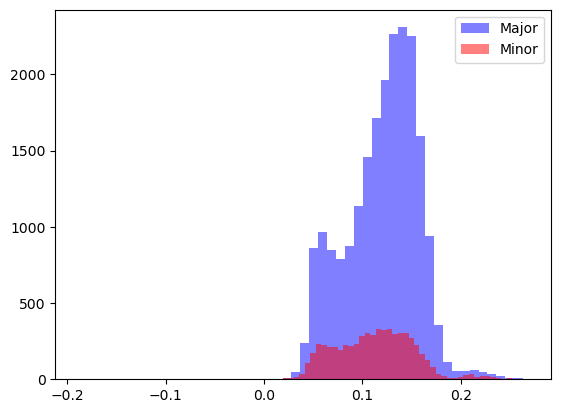

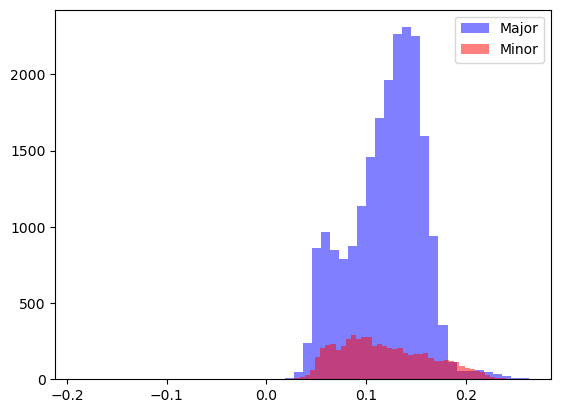

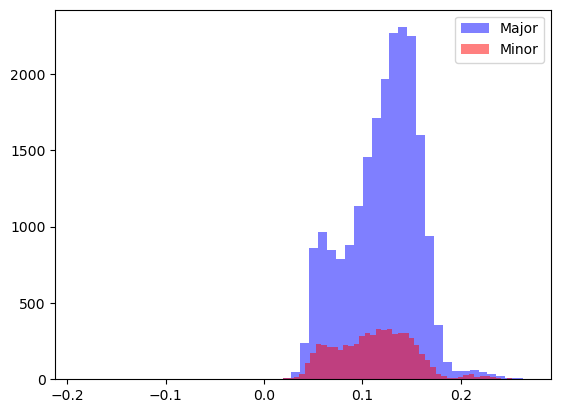

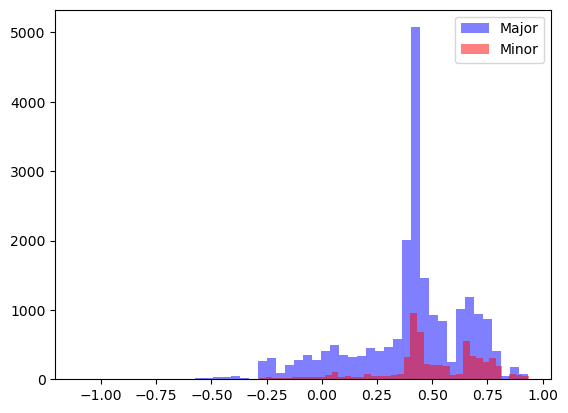

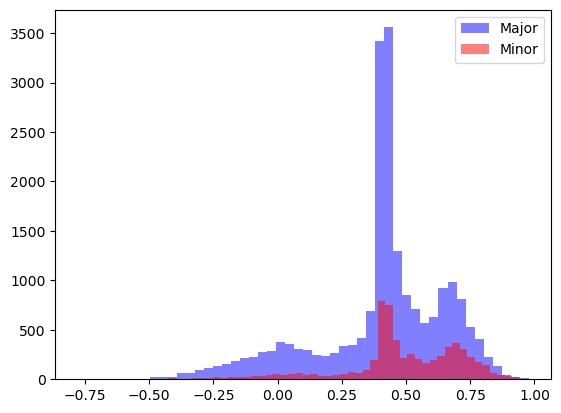

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 2


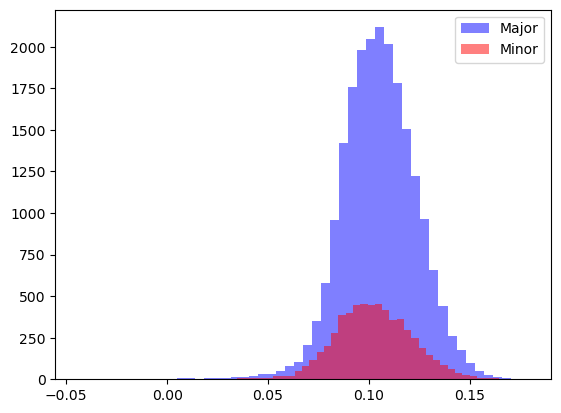

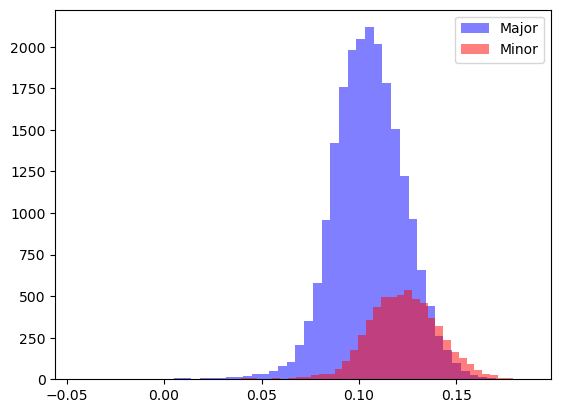

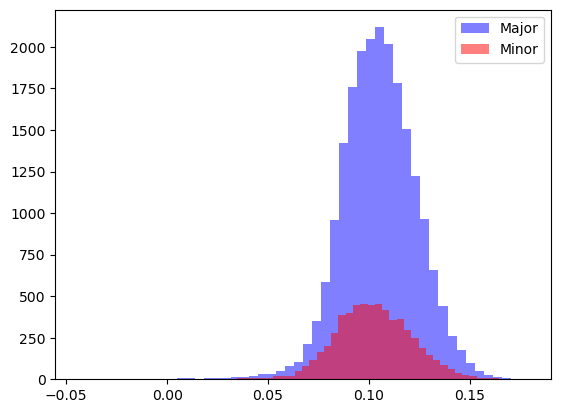

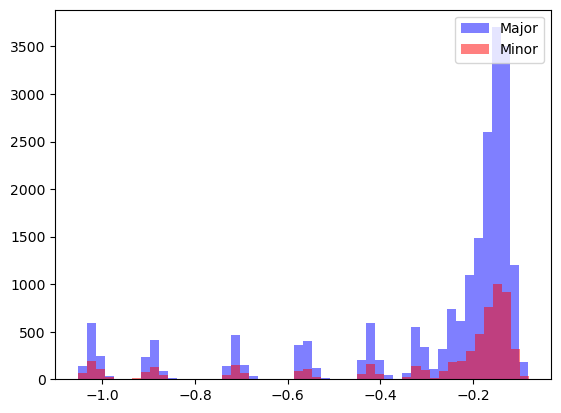

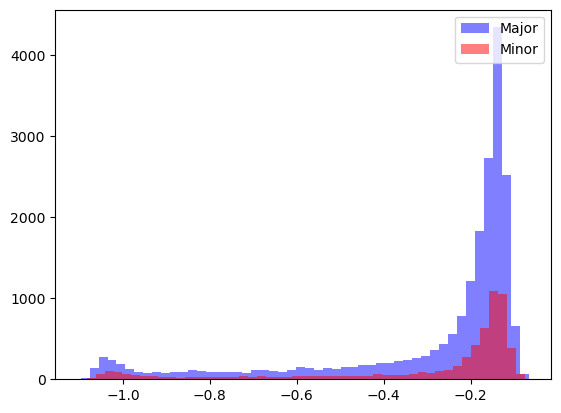

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 3


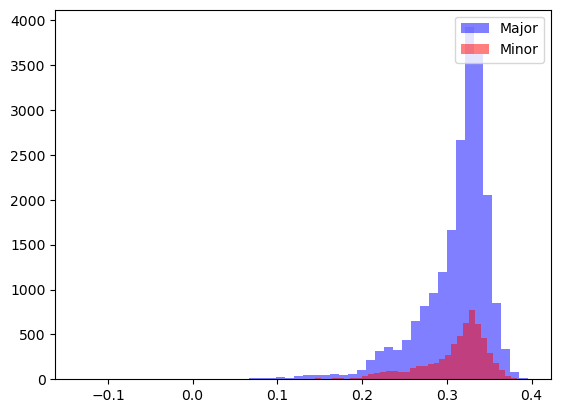

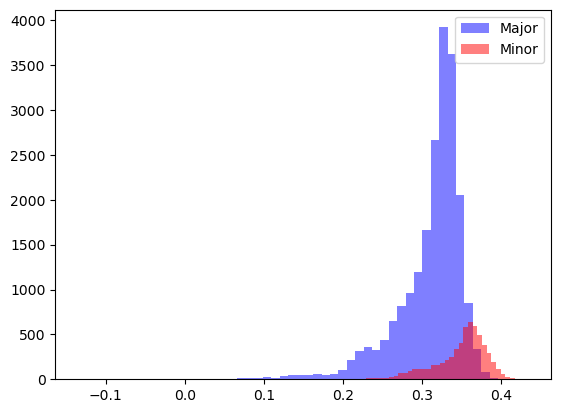

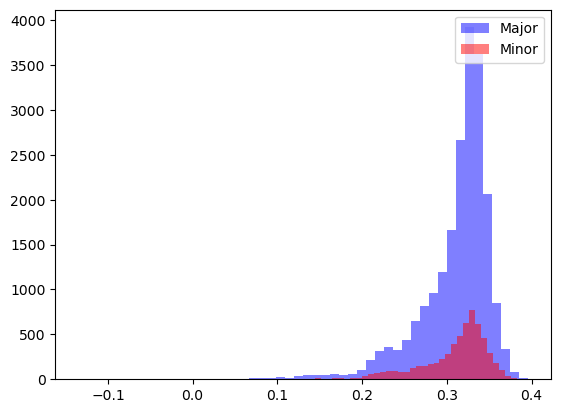

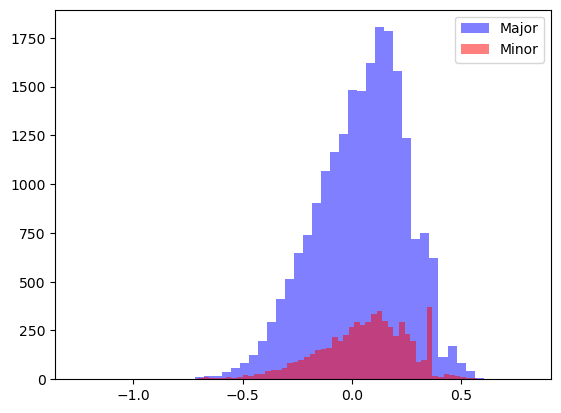

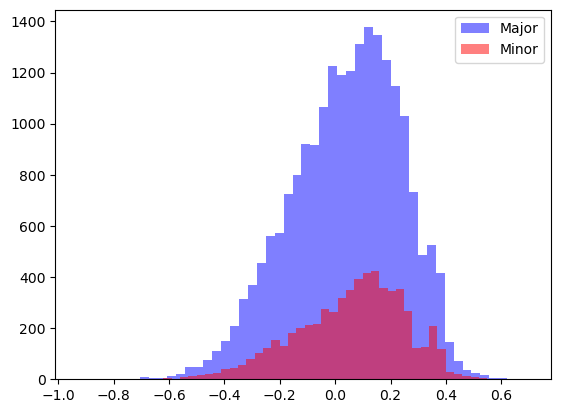

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 4


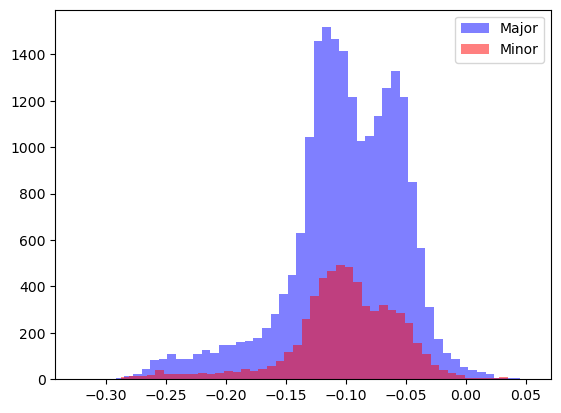

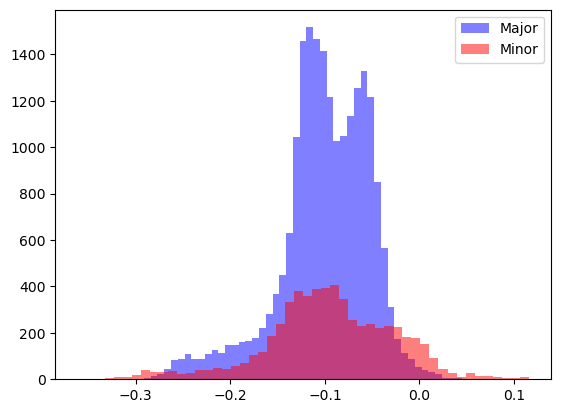

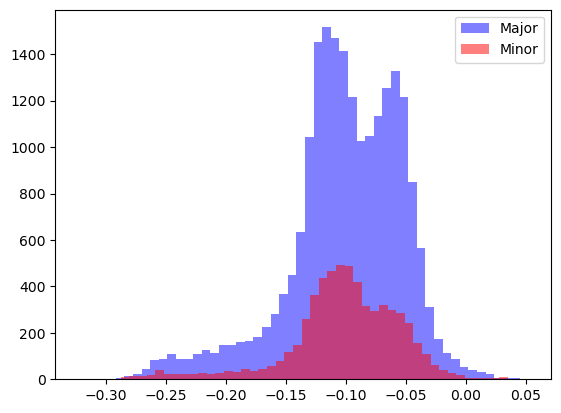

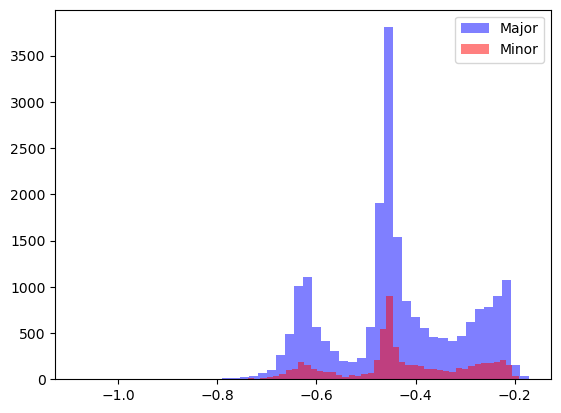

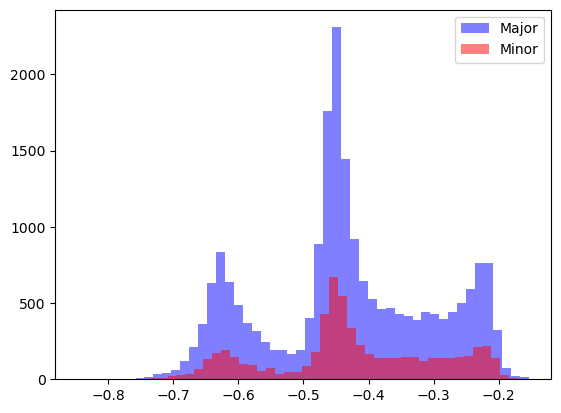

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 5


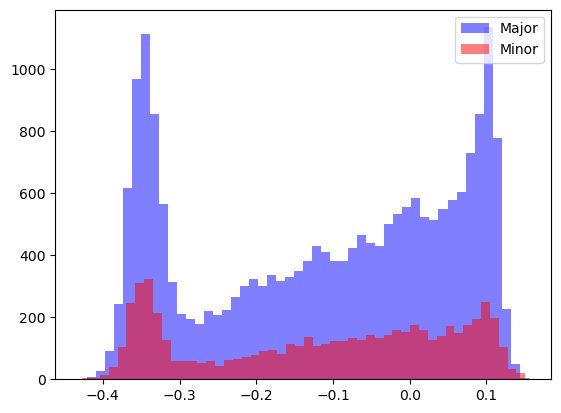

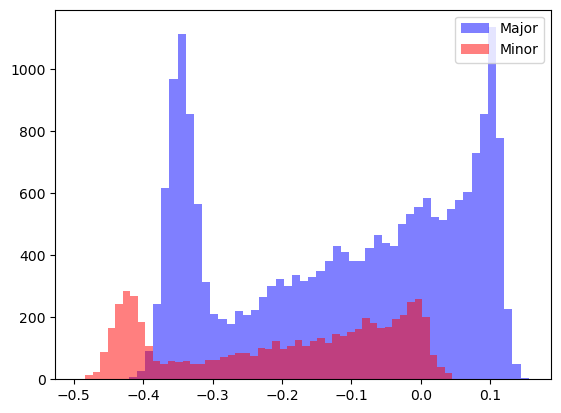

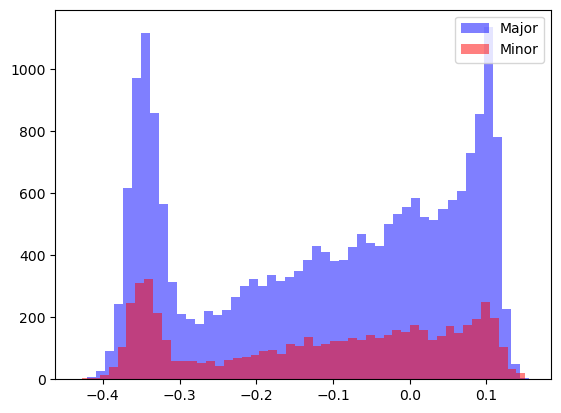

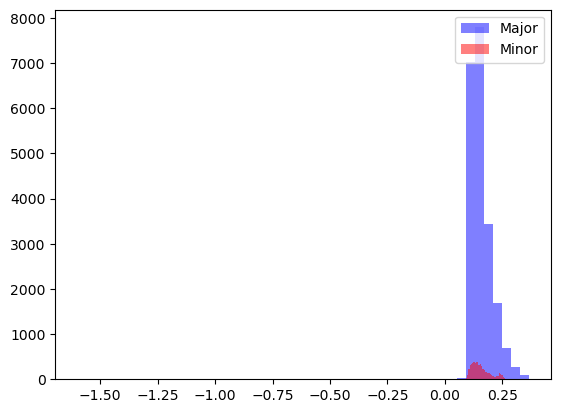

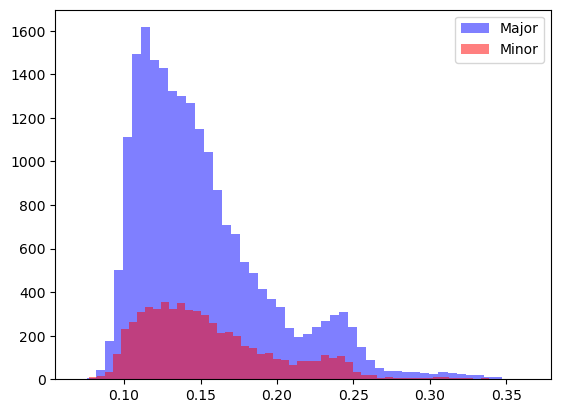

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 6


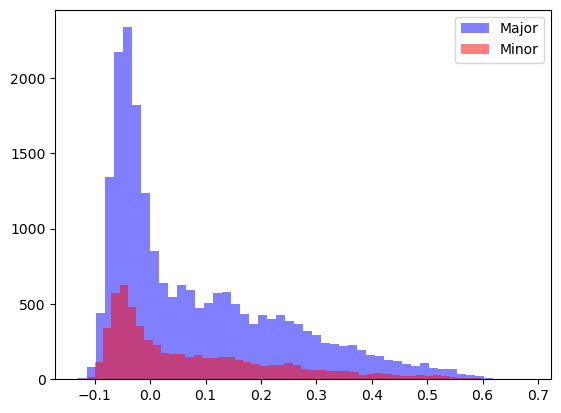

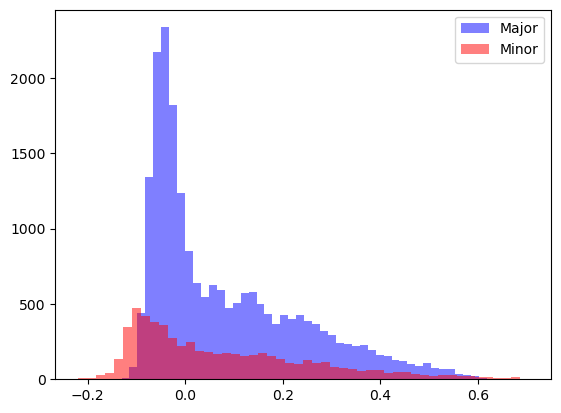

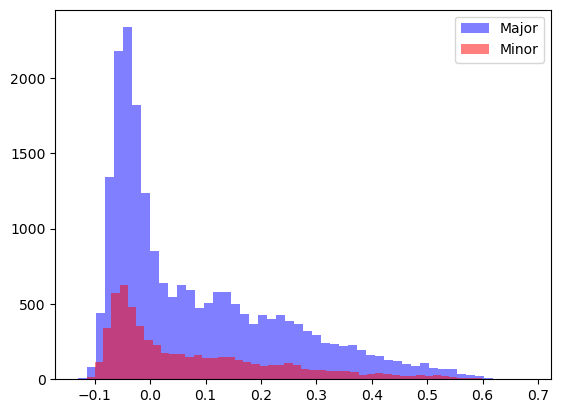

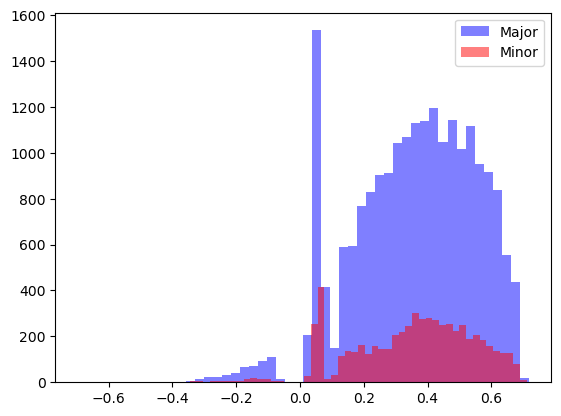

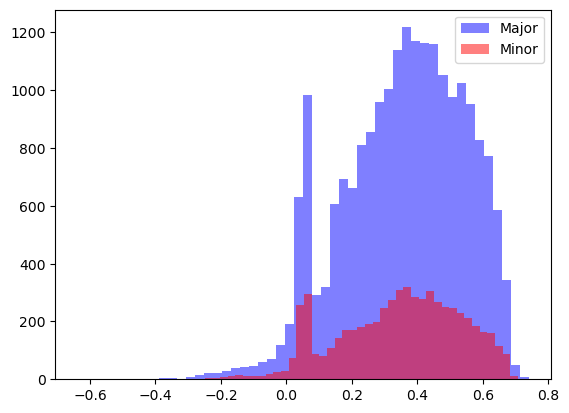

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 7


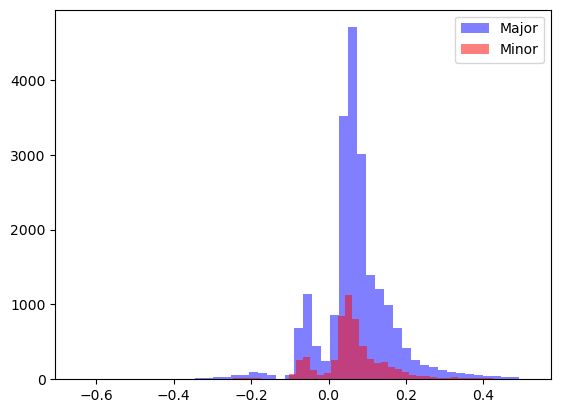

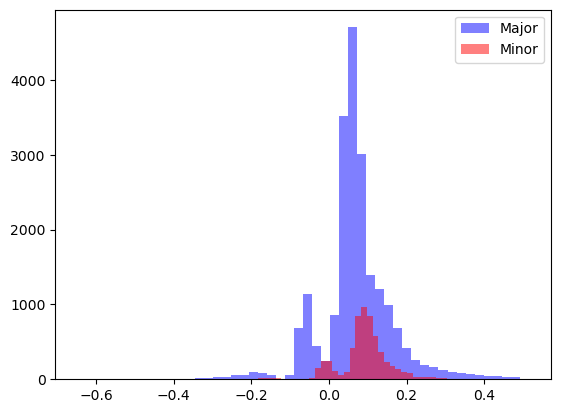

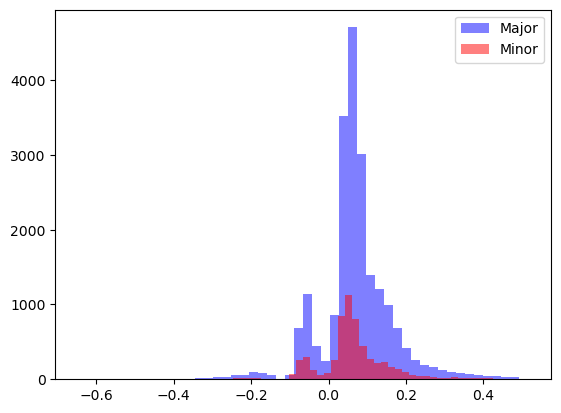

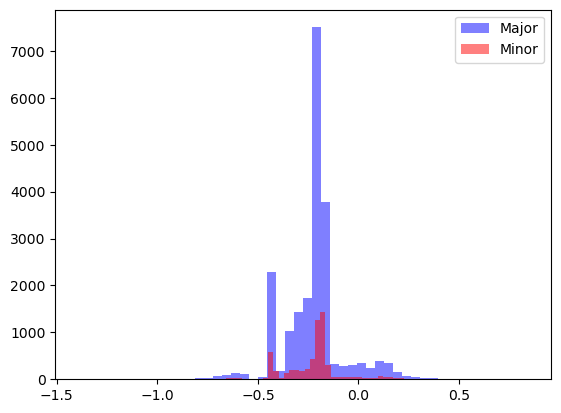

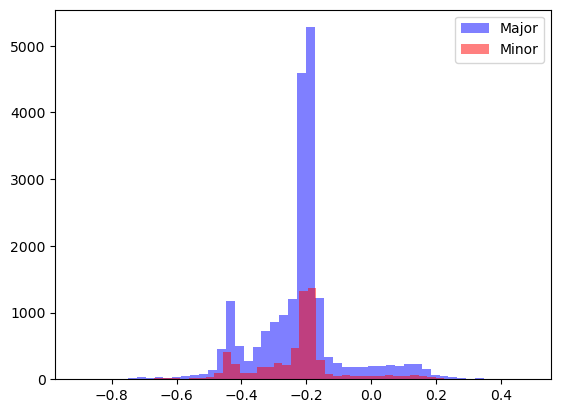

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 8


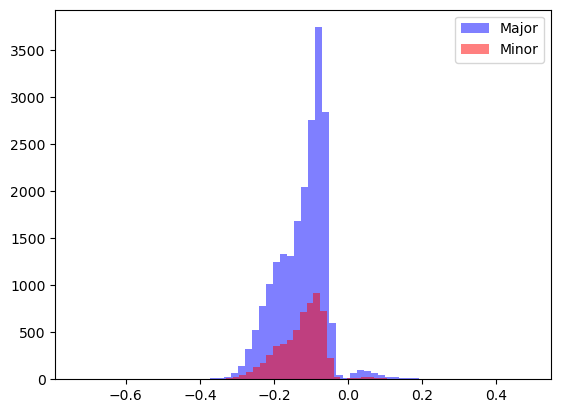

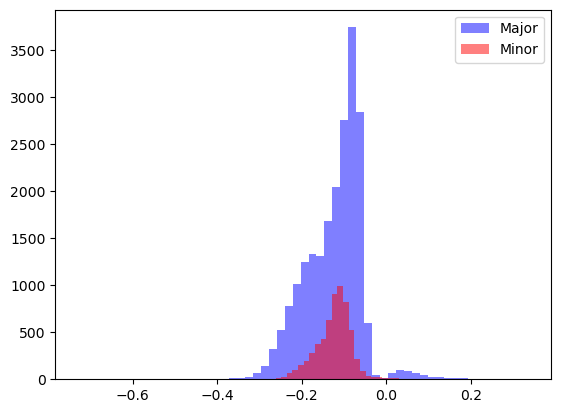

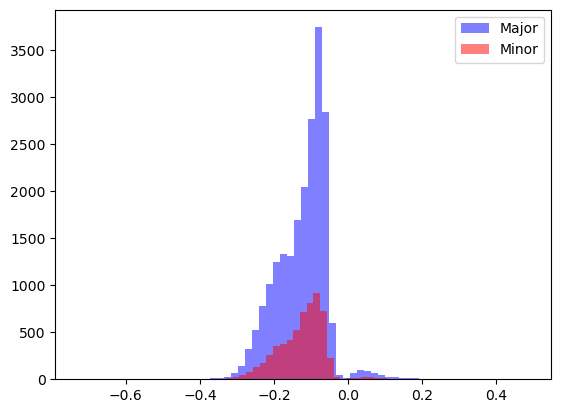

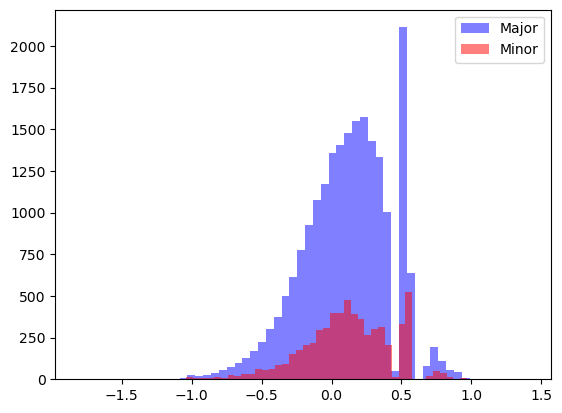

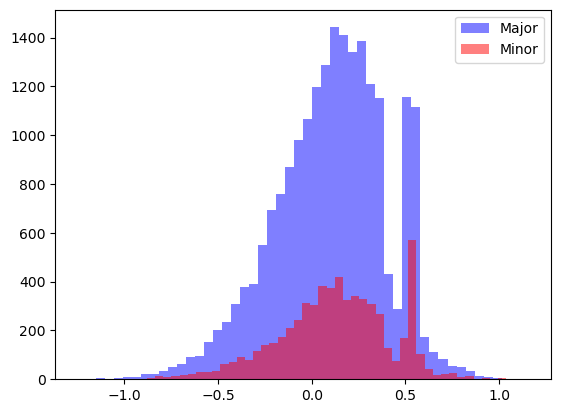

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 9


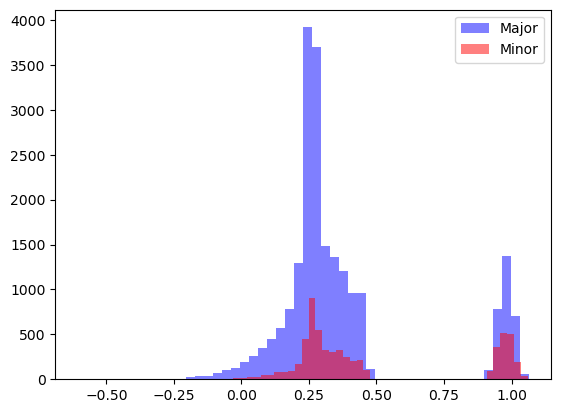

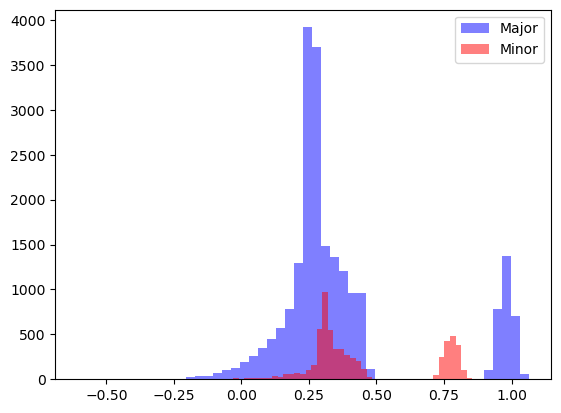

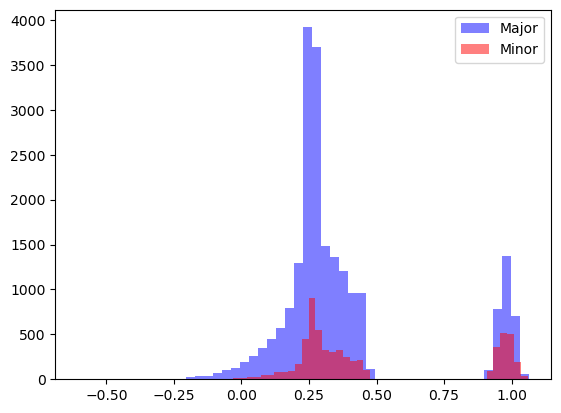

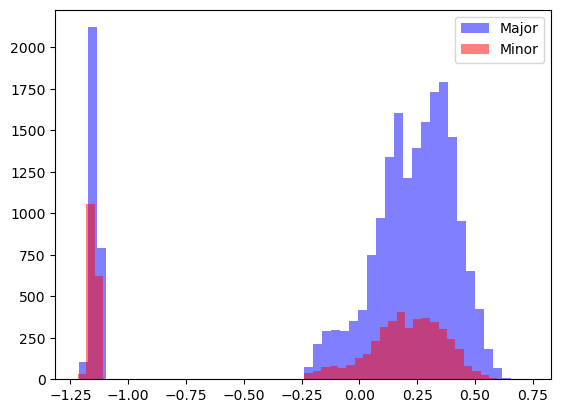

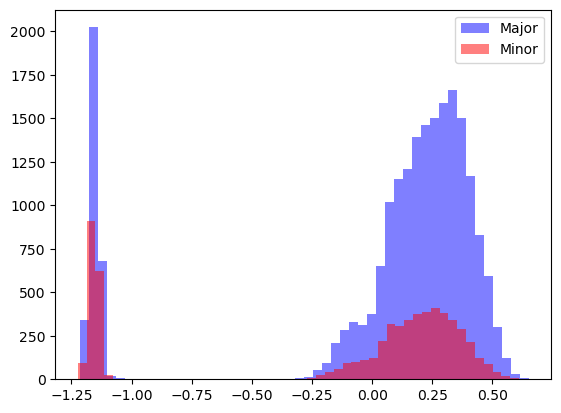

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 10


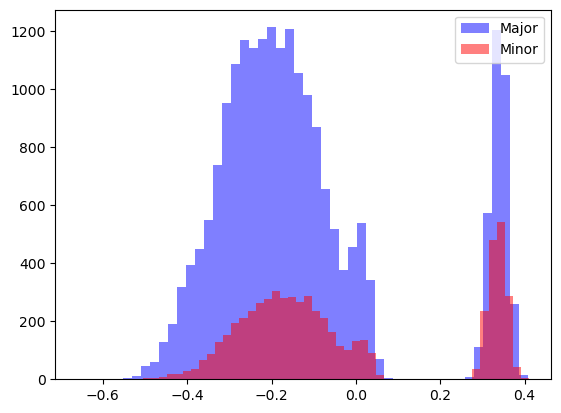

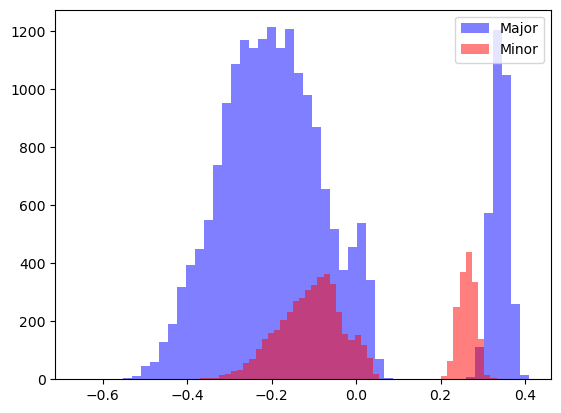

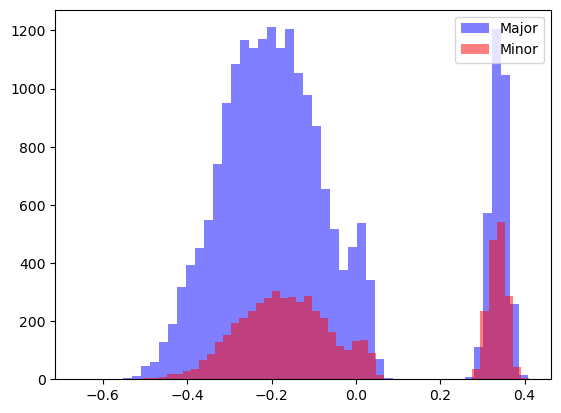

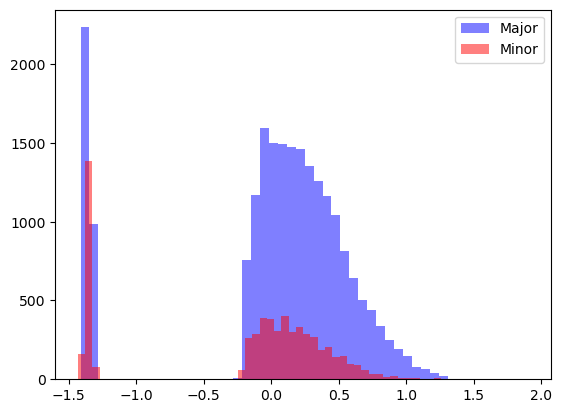

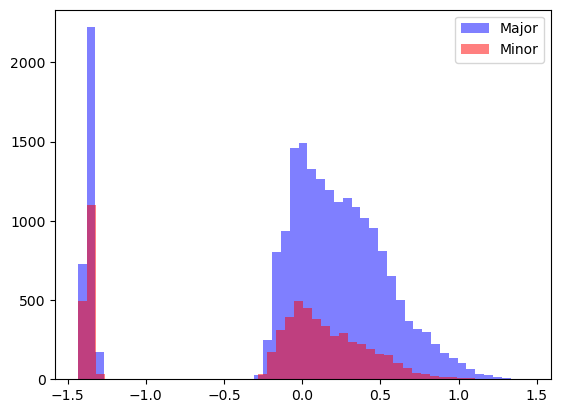

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 11


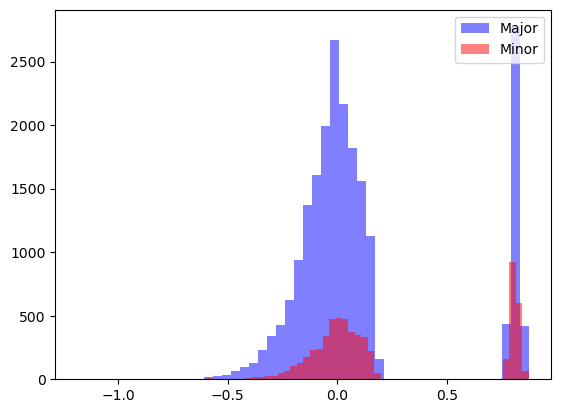

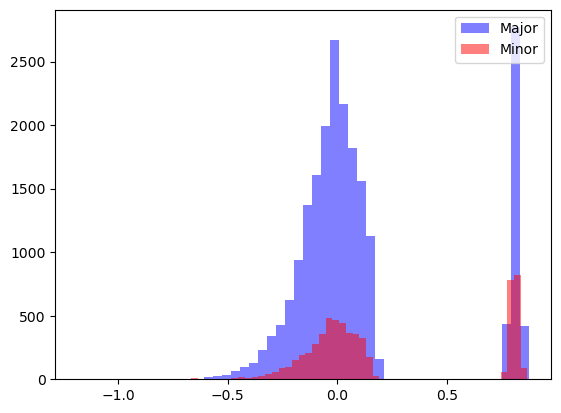

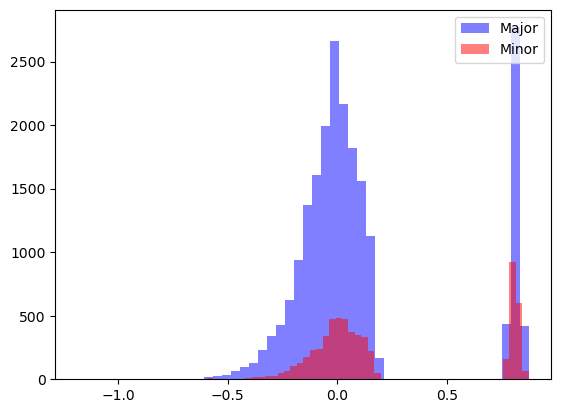

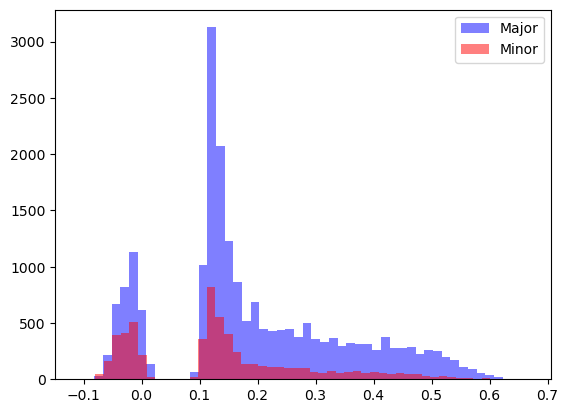

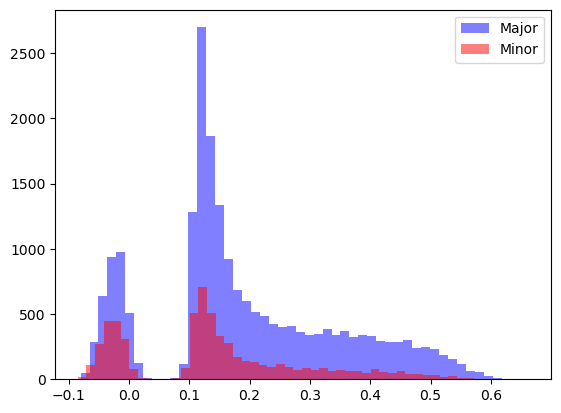

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 12


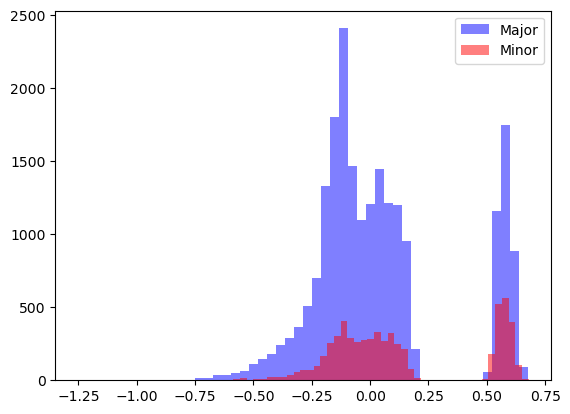

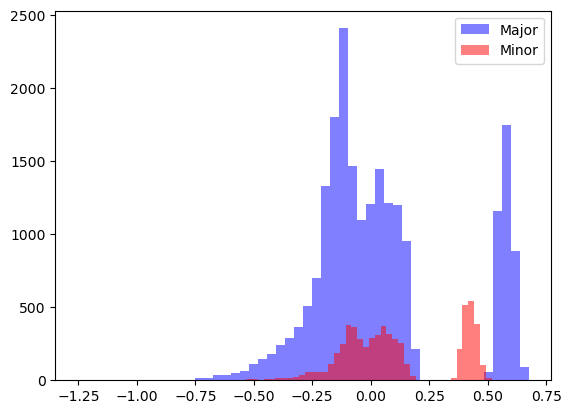

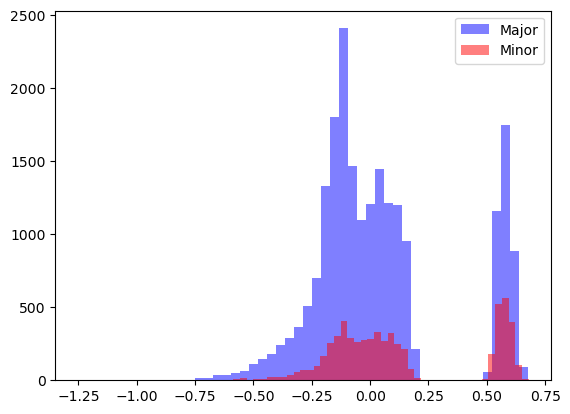

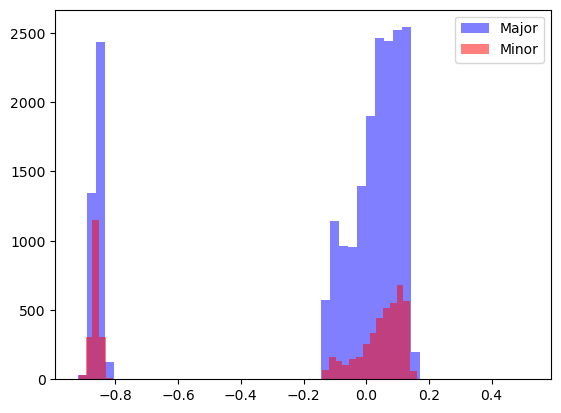

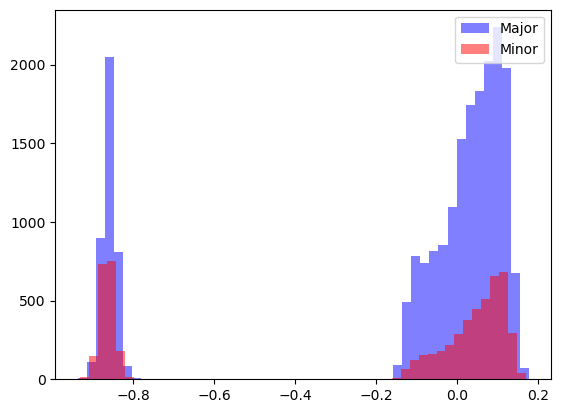

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 13


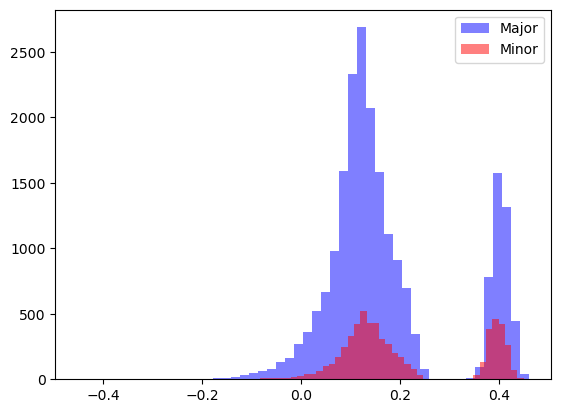

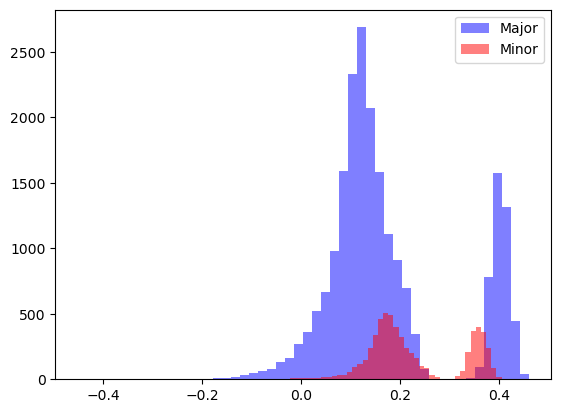

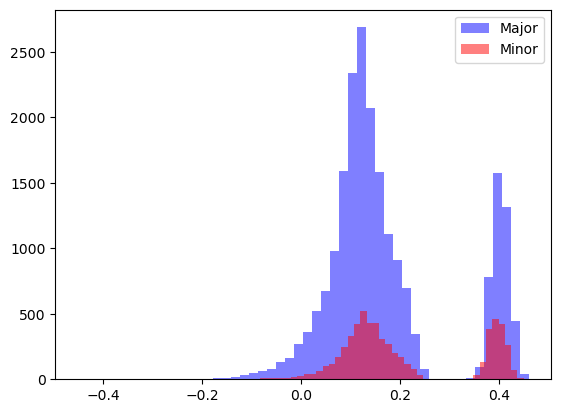

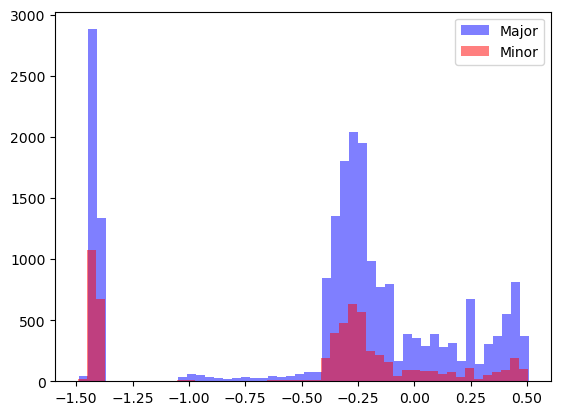

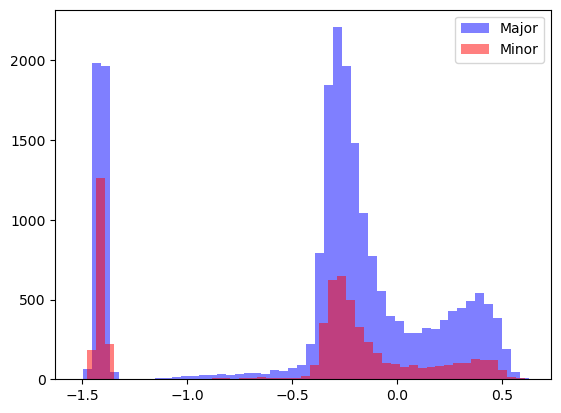

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 14


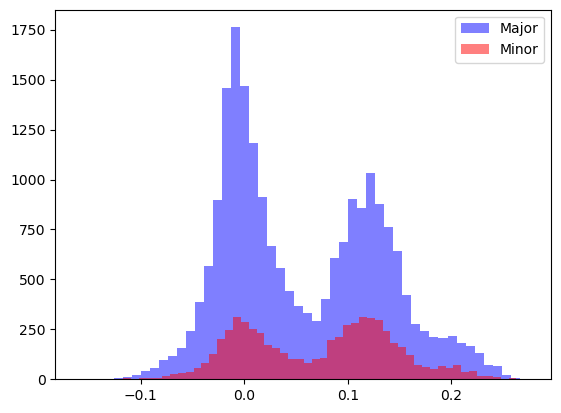

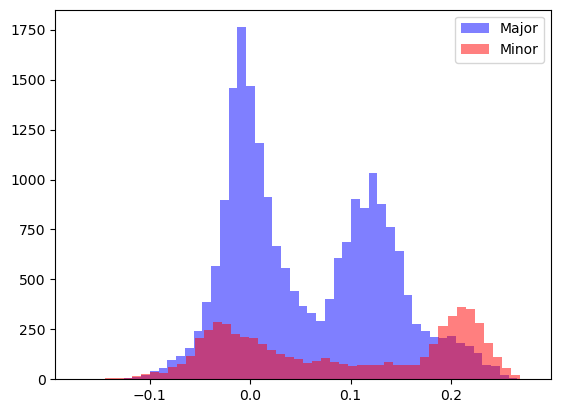

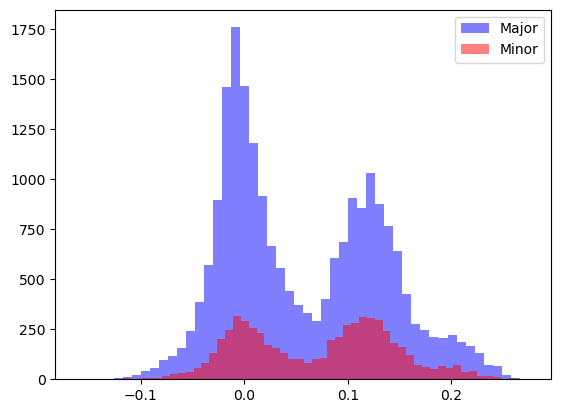

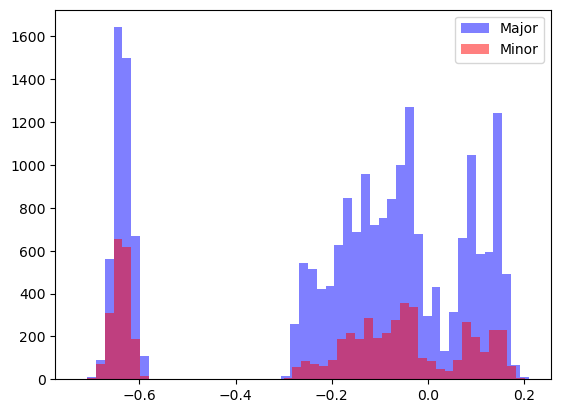

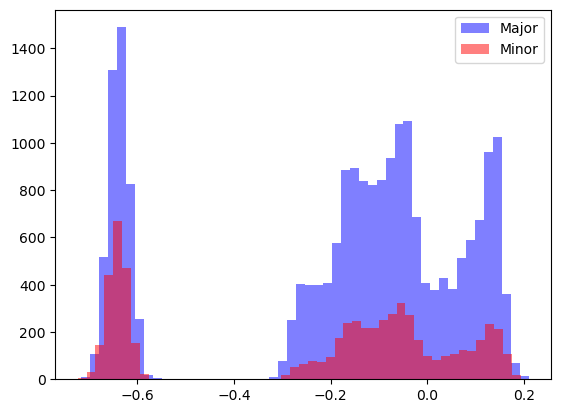

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 15


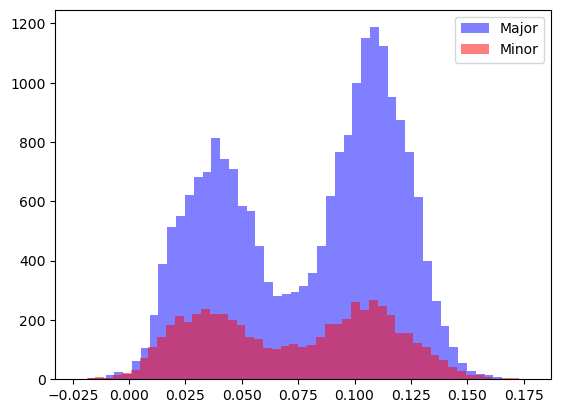

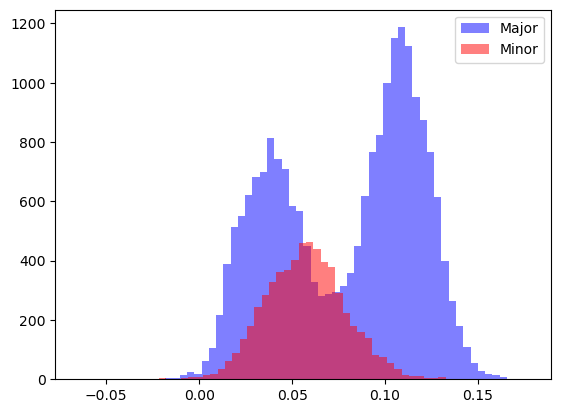

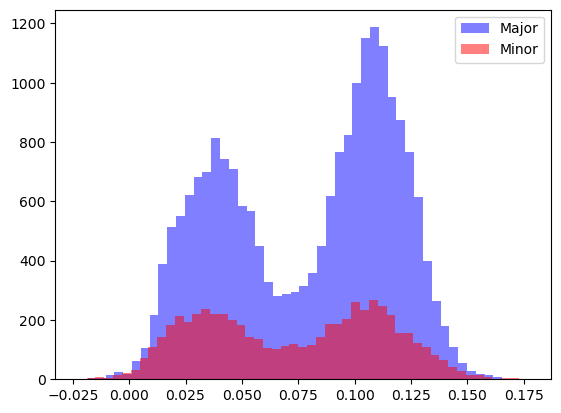

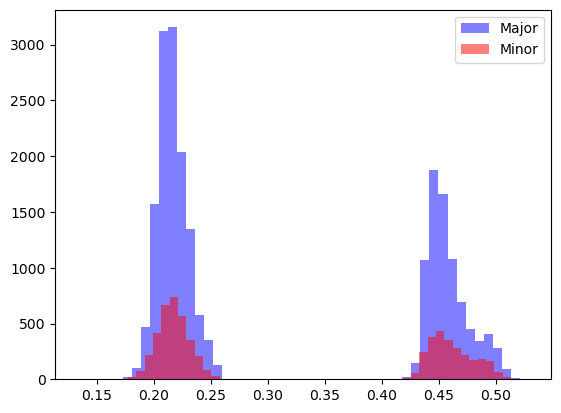

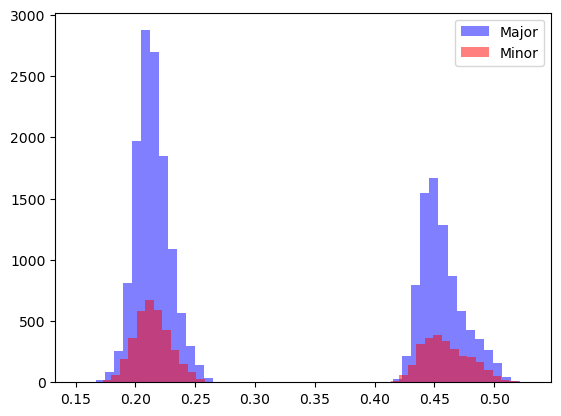

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 16


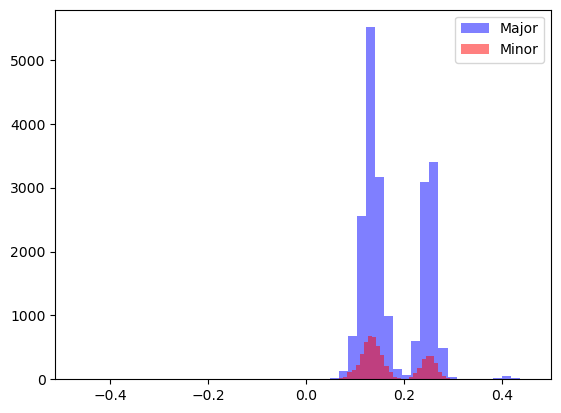

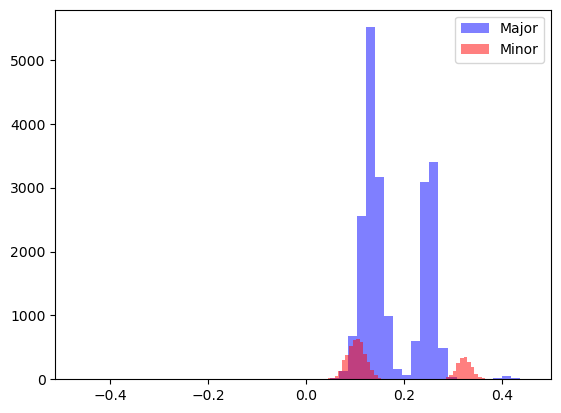

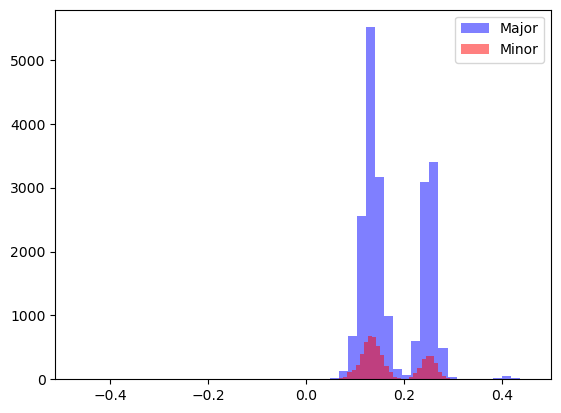

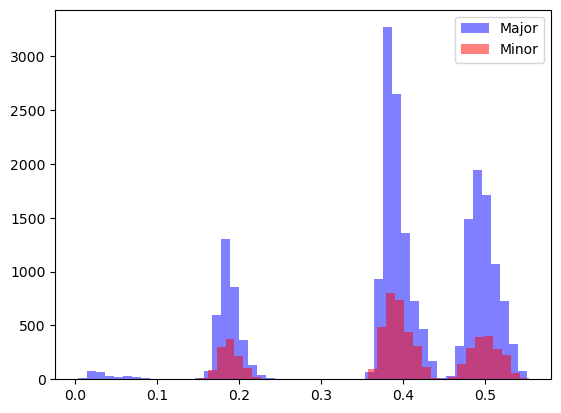

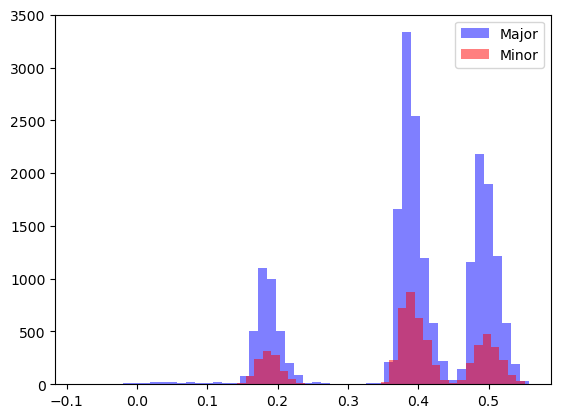

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 17


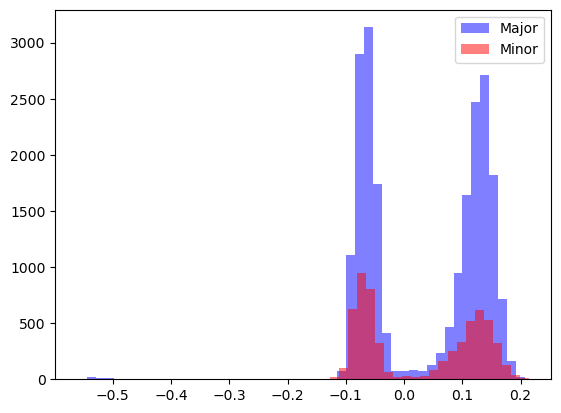

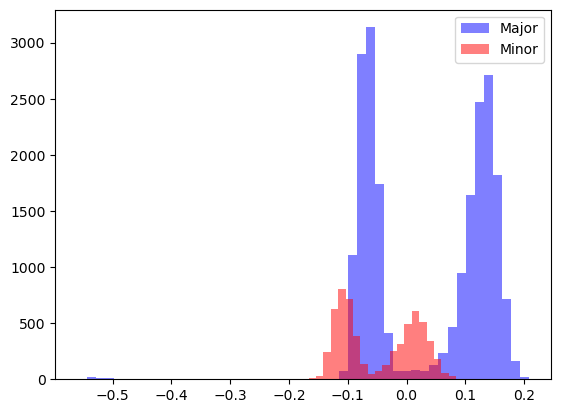

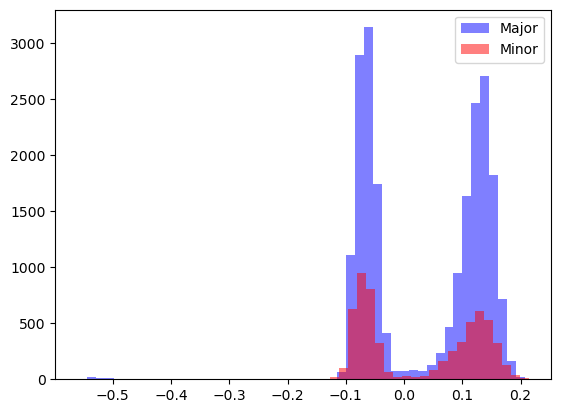

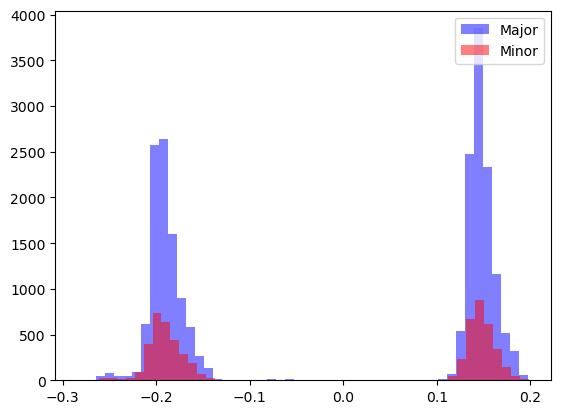

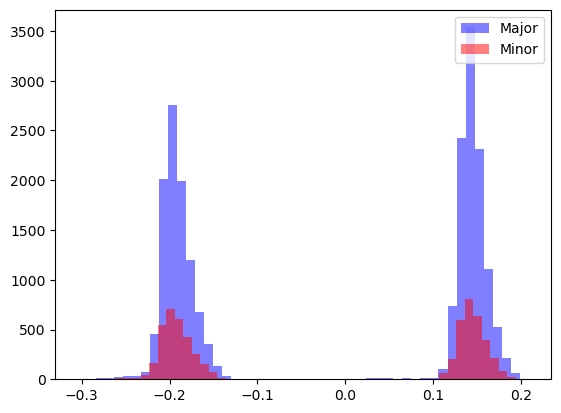

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 18


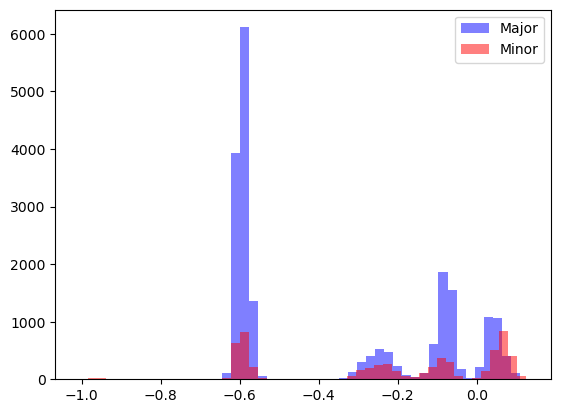

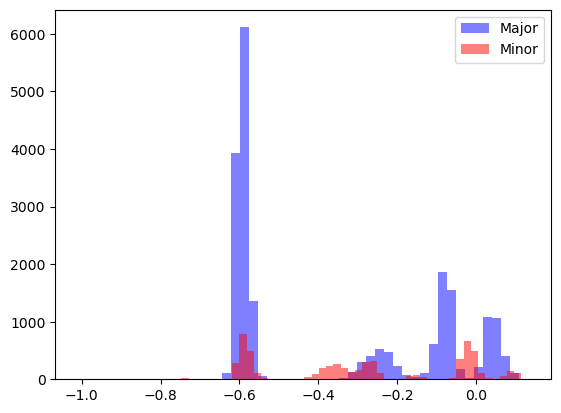

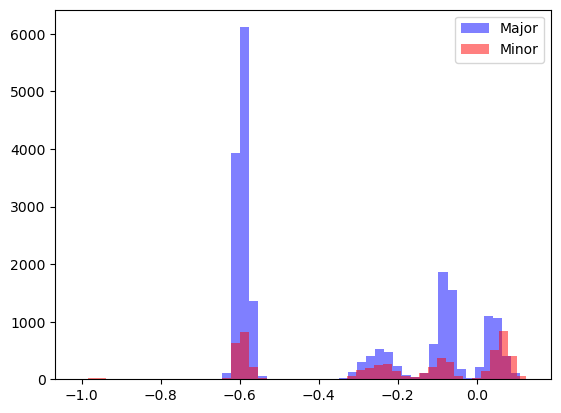

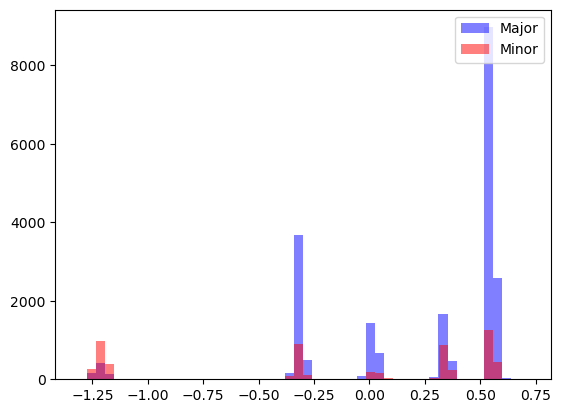

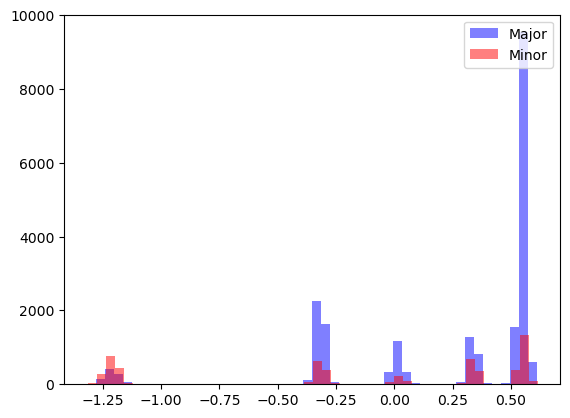

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 19


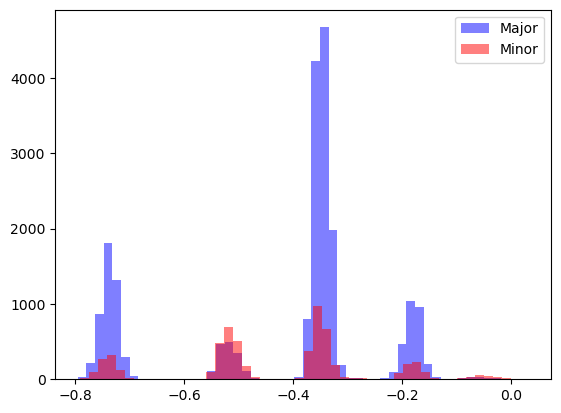

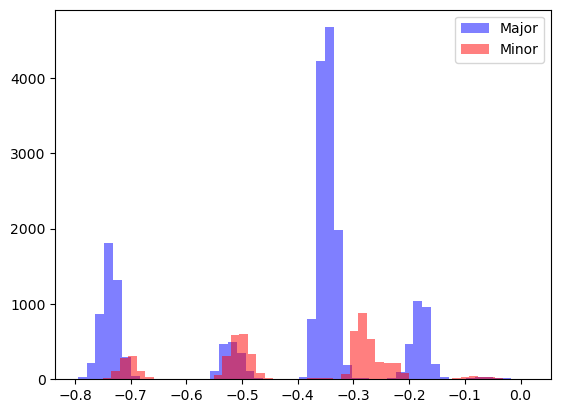

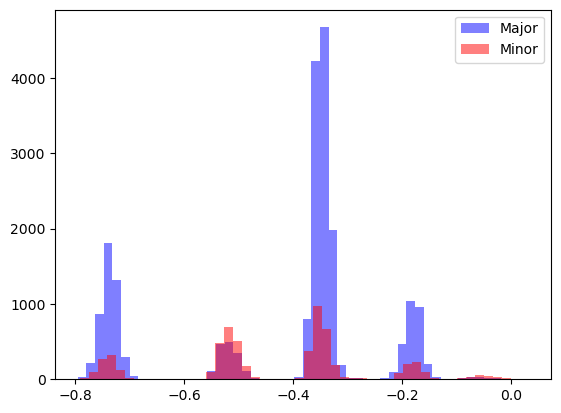

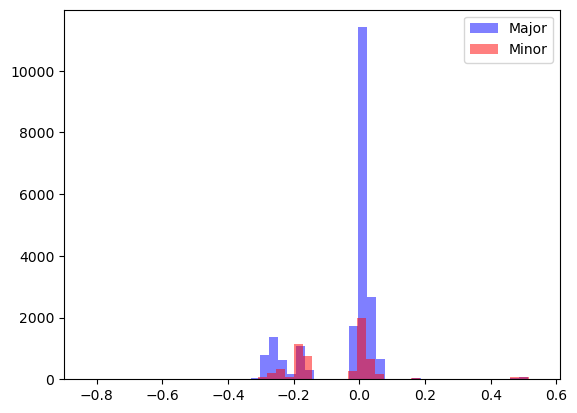

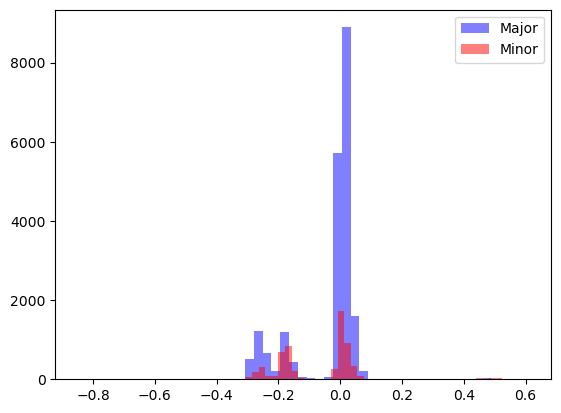

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 20


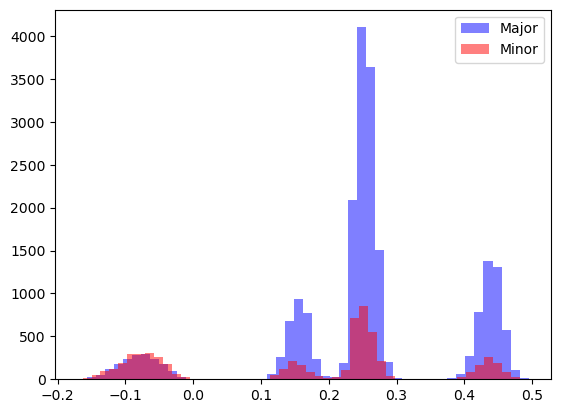

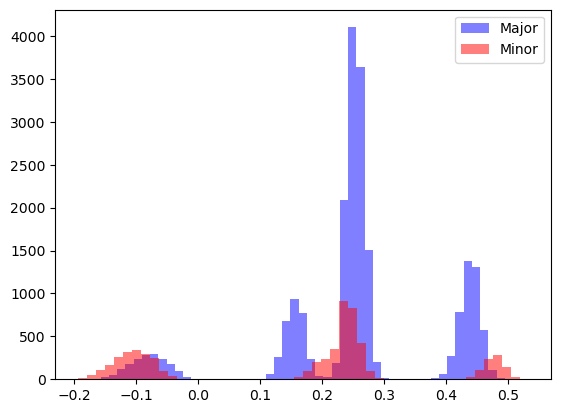

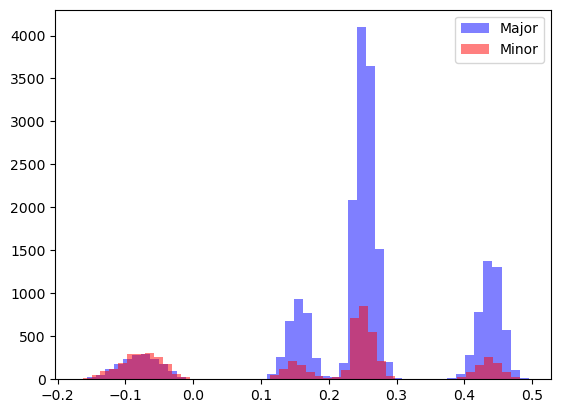

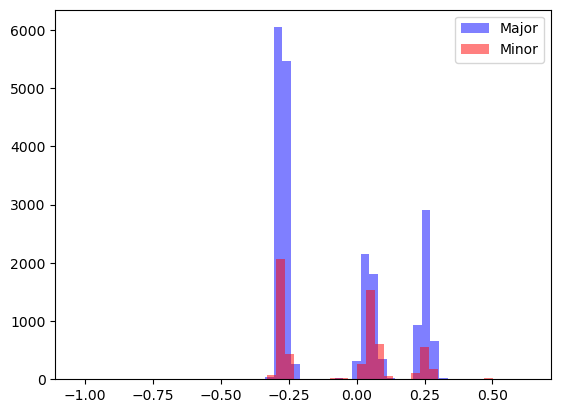

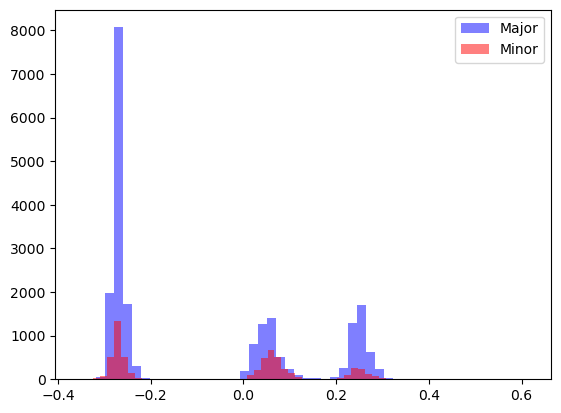

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 21


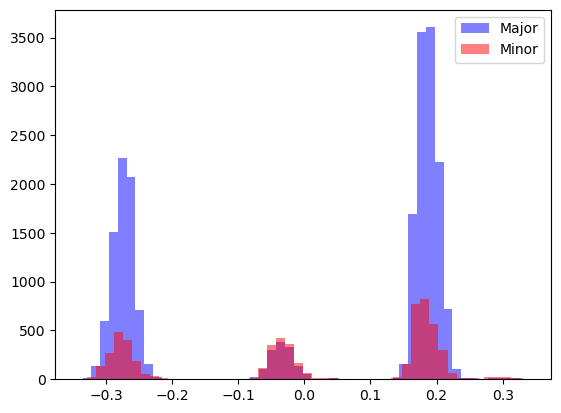

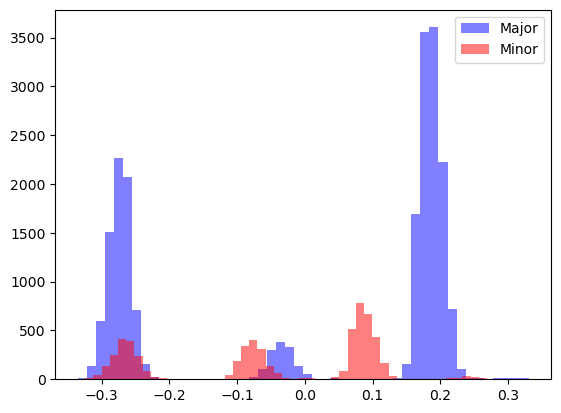

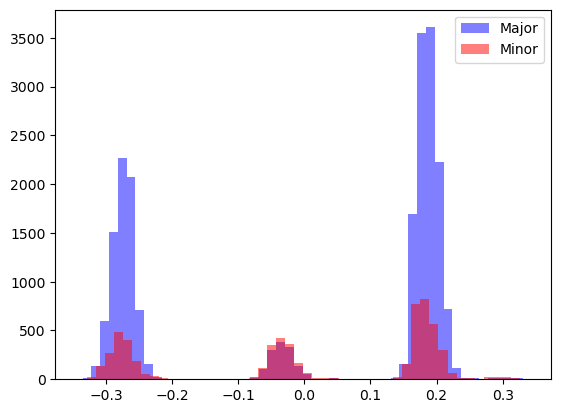

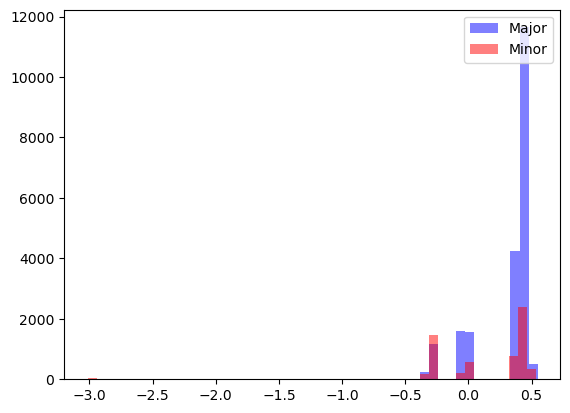

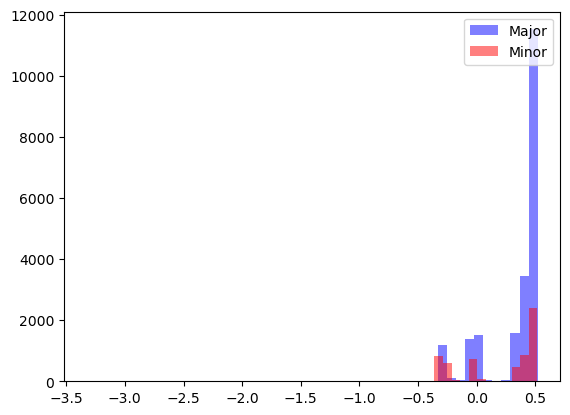

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 22


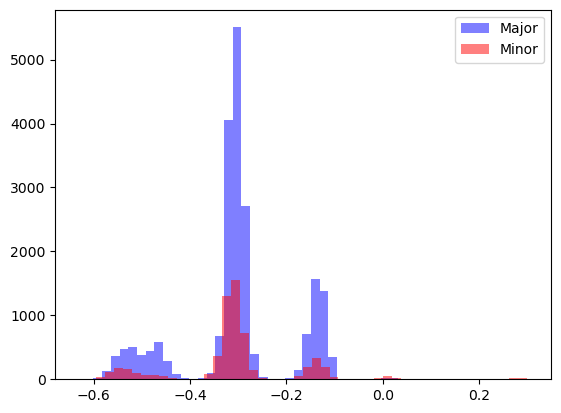

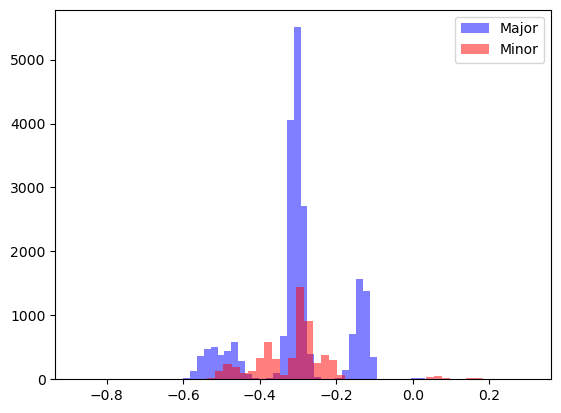

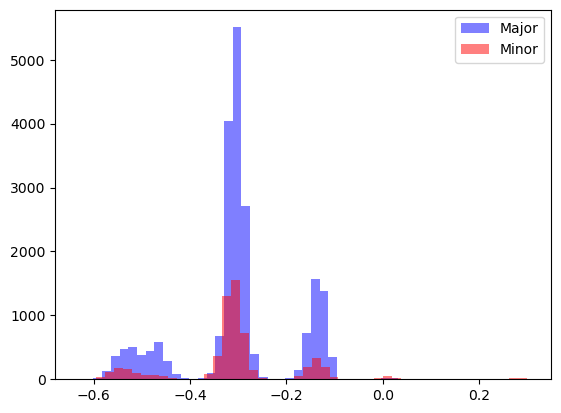

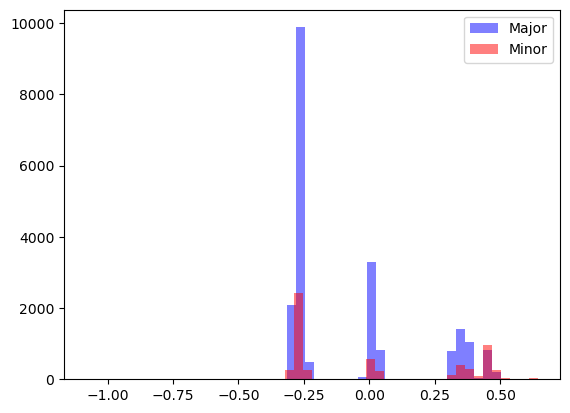

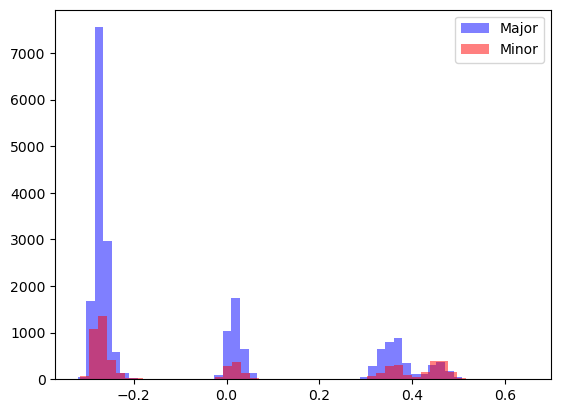

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FEATURE 23


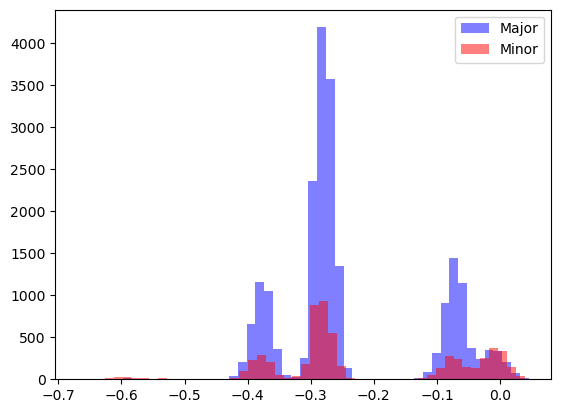

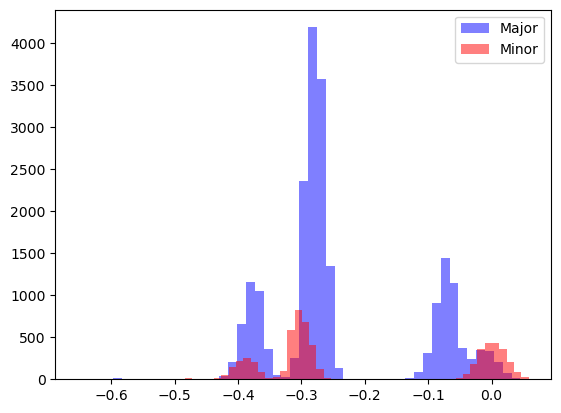

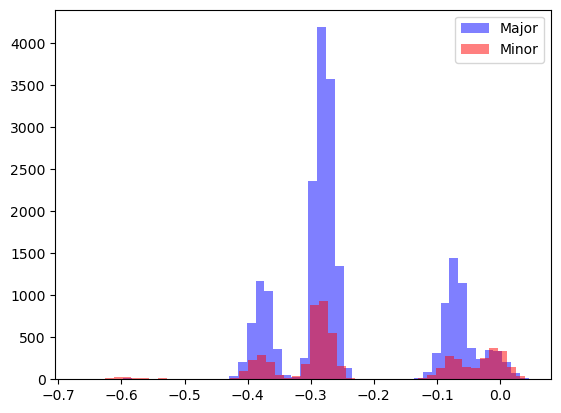

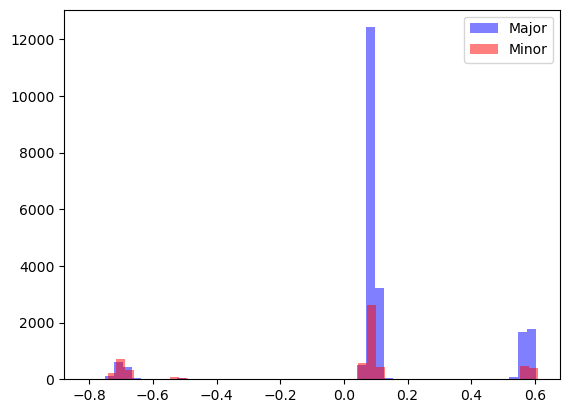

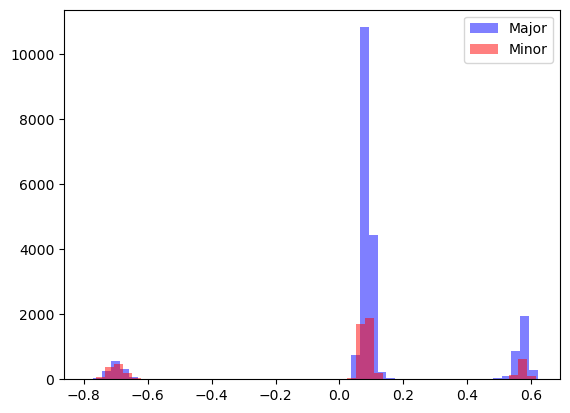

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [11]:
for i in range(0,23):
    print(f"FEATURE {i+1}")
    data1 = train_z_major[:,i+1,:].mean(1)
    data2 = train_z_minor[:,i+1,:].mean(1)
    
    # Plot the histograms
    plt.hist(data1, bins=50, alpha=0.50, label='Major', color='blue')
    plt.hist(data2, bins=50, alpha=0.50, label='Minor', color='red')

    # Add a legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


    data2 = train_z_minor_finetuned[:,i+1,:].mean(1)
    
    # Plot the histograms
    plt.hist(data1, bins=50, alpha=0.50, label='Major', color='blue')
    plt.hist(data2, bins=50, alpha=0.50, label='Minor', color='red')

    # Add a legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

    data1 = train_z_major_finetuned_majorminor_MAJOR[:,i+1,:].mean(1)
    data2 = train_z_major_finetuned_majorminor_MINOR[:,i+1,:].mean(1)
    
    # Plot the histograms
    plt.hist(data1, bins=50, alpha=0.50, label='Major', color='blue')
    plt.hist(data2, bins=50, alpha=0.50, label='Minor', color='red')

    # Add a legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


    # TabSyn VAE (before Diffusion)
    data1 = train_z_major_orig[:,i+1,:].mean(1)
    data2 = train_z_minor_orig[:,i+1,:].mean(1)
    
    # Plot the histograms
    plt.hist(data1, bins=50, alpha=0.50, label='Major', color='blue')
    plt.hist(data2, bins=50, alpha=0.50, label='Minor', color='red')

    # Add a legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


    # TabSyn (after Diffusion)
    data1 = train_z_major_tabsyn[:,i,:].mean(1)
    data2 = train_z_minor_tabsyn[:,i,:].mean(1)
    
    # Plot the histograms
    plt.hist(data1, bins=50, alpha=0.50, label='Major', color='blue')
    plt.hist(data2, bins=50, alpha=0.50, label='Minor', color='red')

    # Add a legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

# COMBINE TWO CSV as ONE CSV

In [22]:
# DUMMY COMBINE TWO CSV FILES AND SAVE AS ONE CSV
import numpy as np

# Get the index for major and minor
csv_path = "/home/hpaat/imbalanced_data/tabsyn/synthetic/default/tabsyn_major.csv"
tabsyn_major = np.loadtxt(csv_path, delimiter=',', skiprows=1)
csv_path = "/home/hpaat/imbalanced_data/tabsyn/synthetic/default/tabsyn_minor.csv"
tabsyn_minor = np.loadtxt(csv_path, delimiter=',', skiprows=1)
tabsyn_final = np.concatenate((tabsyn_major, tabsyn_minor), axis=0)

np.random.shuffle(tabsyn_final)

print(tabsyn_final.shape)

(27000, 24)


In [21]:
import pandas as pd

df = pd.read_csv("/home/hpaat/imbalanced_data/tabsyn/synthetic/default/tabsyn_major.csv", delimiter=',')
heads = df.columns.tolist()

In [23]:
df_final = pd.DataFrame(tabsyn_final, columns=heads)

df_final.to_csv('/home/hpaat/imbalanced_data/tabsyn/synthetic/default/tabsyn_major_ft_minor.csv', sep=',', index=False)